# Probability Models for a Continuous Random Variable
<hr>

1. Uniform Distribution
2. Exponential Distribution
3. Normal Distribution
4. Gamma Distribution
5. Beta Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *

# 1. Uniform Distribution
<hr>

In the uniform distribution, all outcomes are equally likely. It's characterized by two parameters: a lower bound 
$a$ and an upper bound $b$.

$$X \sim \text{Uniform}(a, b)$$

<br>

<div style="text-align:center">
    <img src="media/uniform.png" width=300>
    <figcaption>Uniform Distribution</figcaption>
</div>

\begin{align}
f(x) &= \frac{1}{b-a}, \quad a \leq x \leq b & \text{PDF of Uniform RV} \\
\\
F(x) &= \frac{x-a}{b-a}, \quad a \leq x \leq b & \text{CDF of Uniform RV} \\
\\
E(X) &= \frac{a+b}{2} & \text{Expectation} \\
\\
\text{Var}(X) &= \frac{(b-a)^2}{12} & \text{Variance} \\
\end{align}

## 1.1 Standard Uniform Distribution
If $a=0$ and $b=1$, then the uniform distribution is called `standard uniform distribution`.

**Example:** If a flight is scheduled to arrive at 5pm but actually arrives at a uniformly distributed time between 4:50pm and 5:10pm, what’s the probability that the flight arrives between 5pm and 5:05pm?

<br> 
<div style="text-align:center">
    <img src="media/uniform1.png" width=300>
    <figcaption>Example of Standard Uniform, $P=1/4$</figcaption>
</div>

Let $a=0$ (that is 4:50pm) and $b=20$ (that is 5:10pm):

$$P(10 \leq x \leq 15) = \int_{10}^{15} f(x) dx = \int_{10}^{15} \frac{1}{20} dx = \frac{1}{20} (15-10)= \frac{1}{4}$$

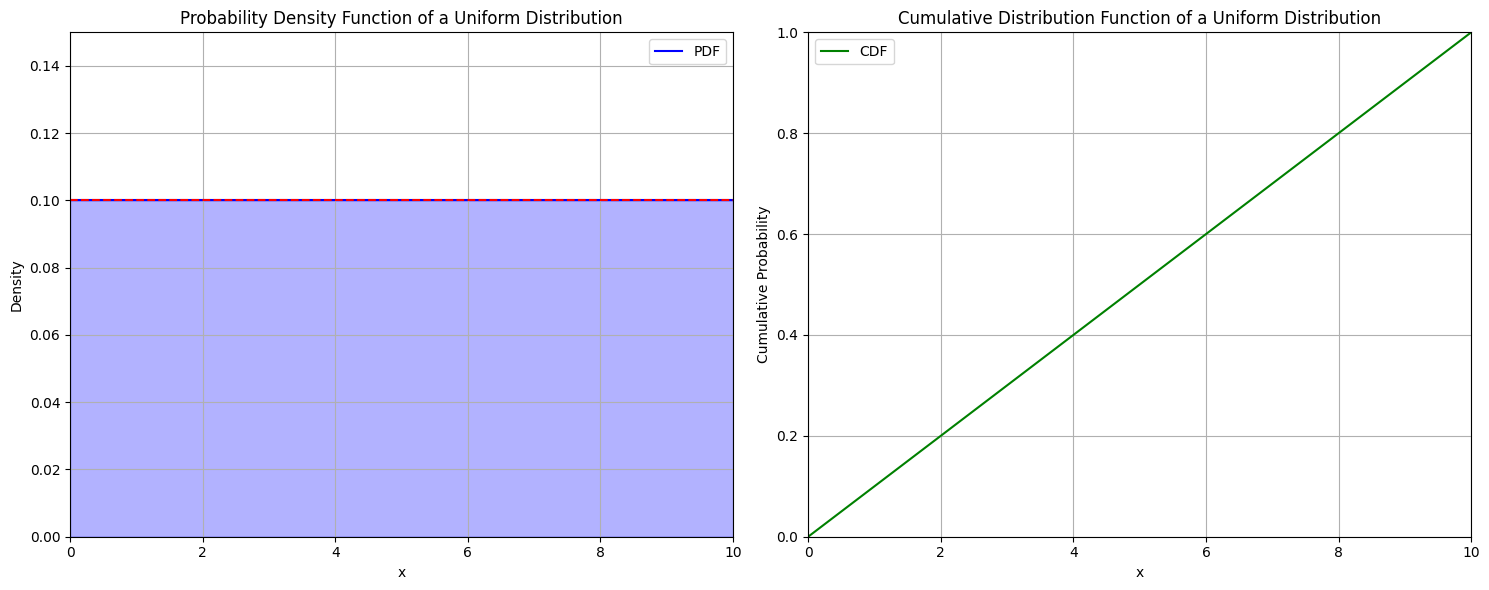

In [2]:
plot_uniform(a=0, b=10)

# 2. Exponential Distribution
<hr>

The Exponential Distribution is widely used to model the time until a rare event occurs or the time between such events. It is particularly significant in reliability analysis and queuing theory.

$$X \sim \text{exp}(\lambda)$$

Where $\lambda$ is the rate parameter, indicating the average number of events in a given time interval.

\begin{align}
f(x) &= \lambda e^{-\lambda x}, \quad x \gt 0 & \text{PDF of Exponential} \\
\\
F(a) &= 1-e^{-\lambda a} & \text{CDF of Exponential} \\
\\
E(X) &= \frac{1}{\lambda} & \text{Expectation} \\
\\
\text{Var}(X) &= \frac{1}{\lambda^2} & \text{Variance} \\
\end{align}

The CDF is derived as:

$$F(a) = P(X \leq a) = \int_0^a \lambda e^{-\lambda x} dx = 1 - e^{-\lambda x}$$

###  Memoryless Property
The Exponential Distribution is "memoryless," meaning the probability of an event occurring in the future is independent of any history. For example, if the waiting time in a bank has already been 5 minutes, the probability of waiting an additional 10 minutes is the same as if the waiting had just begun.

Mathematically, this property is expressed as:

$$P(T > t + x \mid T > t) = P(T > x), \forall{t}, x > 0$$

Here, $T$ represents the waiting time and follows an Exponential Distribution with rate $\lambda$.

### Relation to Poisson Distribution
While the Poisson Distribution models the number of discrete occurrences in a fixed interval, the Exponential Distribution models the time between such continuous occurrences.

**Example:** Jobs are sent to a printer at an average rate of 3 jobs per hour.

What's the expected time between jobs?

$$\lambda=3 \quad E(X)=\frac{1}{\lambda}=\frac{1}{3}$$

What's the probability that the next job is sent within 5 minutes?

$$P(X<5)=F(5)$$

Notice that we modeled the expected value in hours, therefore:

$$P(X<5)=F\left(\frac{5}{60}\right)=F\left(\frac{1}{12}\right)=1-e^\left(\frac{-3}{12}\right)=1-e^\left(\frac{-1}{4}\right)$$

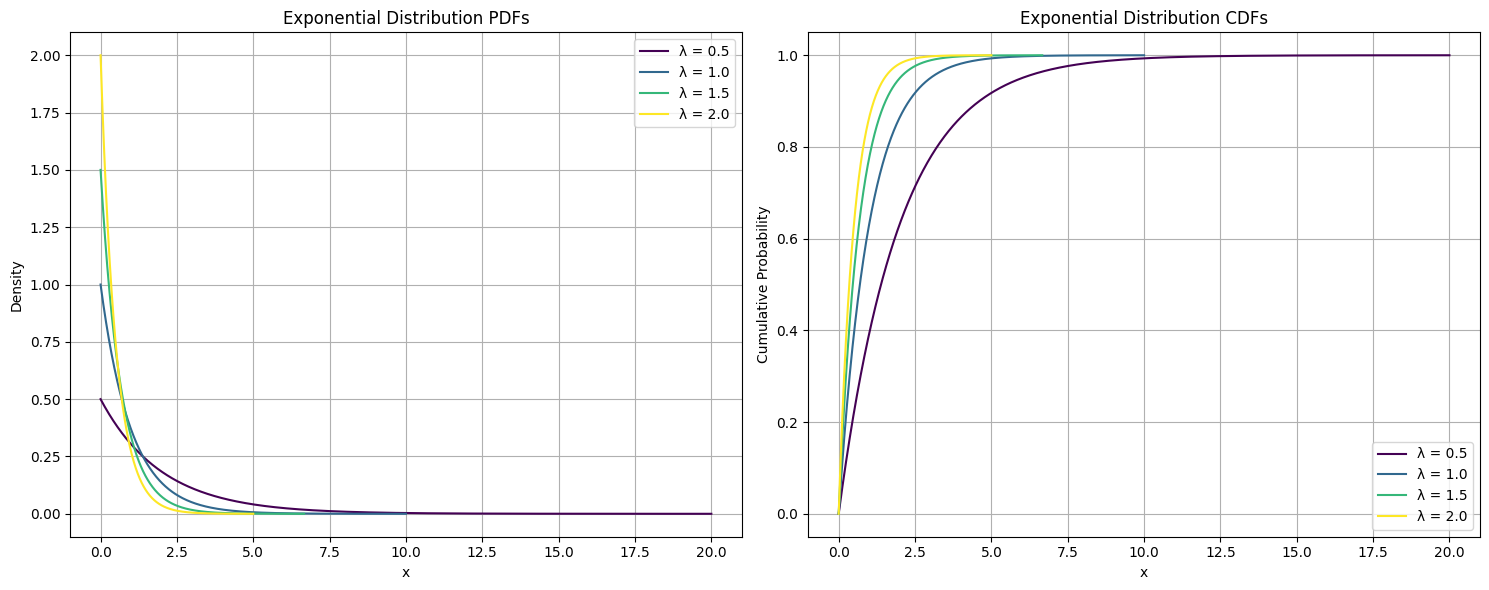

In [3]:
lambda_values=np.array([0.5, 1, 1.5, 2])
plot_exponential(lambda_values)

# 3. Normal Distribution
<hr>

The Normal Distribution, also known as the Gaussian Distribution, is a cornerstone of probability theory and statistics due to its properties and natural occurrences in many real-world scenarios.

$$X \sim N(\mu, \sigma^2)$$

Where $\mu$ is the center of the distribution and $\sigma^2$ is the spread or variance of the distribution.

### Normal PDF

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-1}{2} \left( \frac{X-\mu}{\sigma} \right)^2}$$

\begin{align}
E(X) &= \mu & \text{Expectation} \\
\\
\text{Var}(X) &= \sigma^2 & \text{Variance} \\
\end{align}

### Significance of the Normal Distribution
- Ubiquitous in Real-World Data: Heights, weights, test scores, and many other types of data naturally follow a normal distribution.
- **Analytical Tractability:** Its mathematical properties make it convenient for statistical analysis.
- **Central Limit Theorem:** The theorem states that the distribution of sample averages approximates a normal distribution as the sample size becomes large, regardless of the shape of the population distribution.

## 3.1 Standard Normal Distribution
<hr>

- A special case of the normal distribution with $\mu=0$ and $\sigma=1$
- Notation: $Z \sim N(0,1)$
- **Normalization:** Any normal distribution can be converted to the standard normal distribution using the formula $Z= \frac{X-\mu}{\sigma}$

*$X-\mu$ is the distance of a value of $X$ from the mean value. When we divide that distance by the standard deviation, we are measuring the distance now in units of standard deviation. Therefore, $\frac{X-\mu}{\sigma}$ asks how many standard deviations is $X$ away from the mean value?

**Example:** Assume that an accounting graduate received a job offer of 72k and a marketing graduate also received an offer of 85k. Assume that the distribution of salaries for the accounting job is normally distributed with mean of 60k and standard deviation of 5k. The distribution of salaries for the marketing job is normally distributed with mean of 105k and standard deviation of 2k. Which one of the graduates got a better job offer?

$$Z_1=\frac{X-\mu}{\sigma}=\frac{72-60}{5}=2.4$$

$$Z_2=\frac{X-\mu}{\sigma}=\frac{85-105}{2}=-10$$

Therefore, the accounting major got an offer of 2.4 standard deviations above the mean, while the marketing major got an offer of 10 standard deviations below the mean. In general, 3 standard deviation is considered very poor.

## 3.2 Empirical Rule
<hr>

- 68% of the data falls within 1 standard deviation $(\sigma)$ of the mean.
- 95.4% falls within 2 standard deviations of the mean.
- 99.7% falls within 3 standard deviations of the mean.

**Example:** Assume that the height of males follows a normal distribution with mean value equal to $70"$. What proportion of the population is between $70"$ and $70"+2\sigma$.

$$P(\mu \leq X \leq 2\sigma)=\frac{95.4}{2}=0.477$$

## 3.3 Central Limit Theorem (CLT)
<hr>

As the sample size $n$ increases, the distribution of the sample means approaches a normal distribution, regardless of the shape of the population distribution. For large $n$, the sample mean $\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$


## 3.4 Normal Approximation to the Binomial
<hr>

Let $X \sim \text{Binomial}(n,p)$. If $n$ is large and $\text{min}⁡(n \times p , n(1-p)) \geq 5$, then $X \sim N(np,np(1-p))$.
In the example of tossing a coin, if the coin is biased $P(\text{H or T}) \approx 1$ or $P(\text{H or T}) \approx 0$, then we cannot use this approximation.

**Example:** If $X \sim \text{Binomial}(100,0.45)$, use the Normal approximation to the Binomial to find the probability that $X \geq 30$.

$$\text{min}⁡(100 \times 0.45,100(1-0.45)) = \text{min}(45,55) \geq 5$$

$$X \sim N(100 \times 0.45,100 \times 0.45(1-0.45) = N(45,24.75)$$

$$P(X \geq 30)=0.99871$$

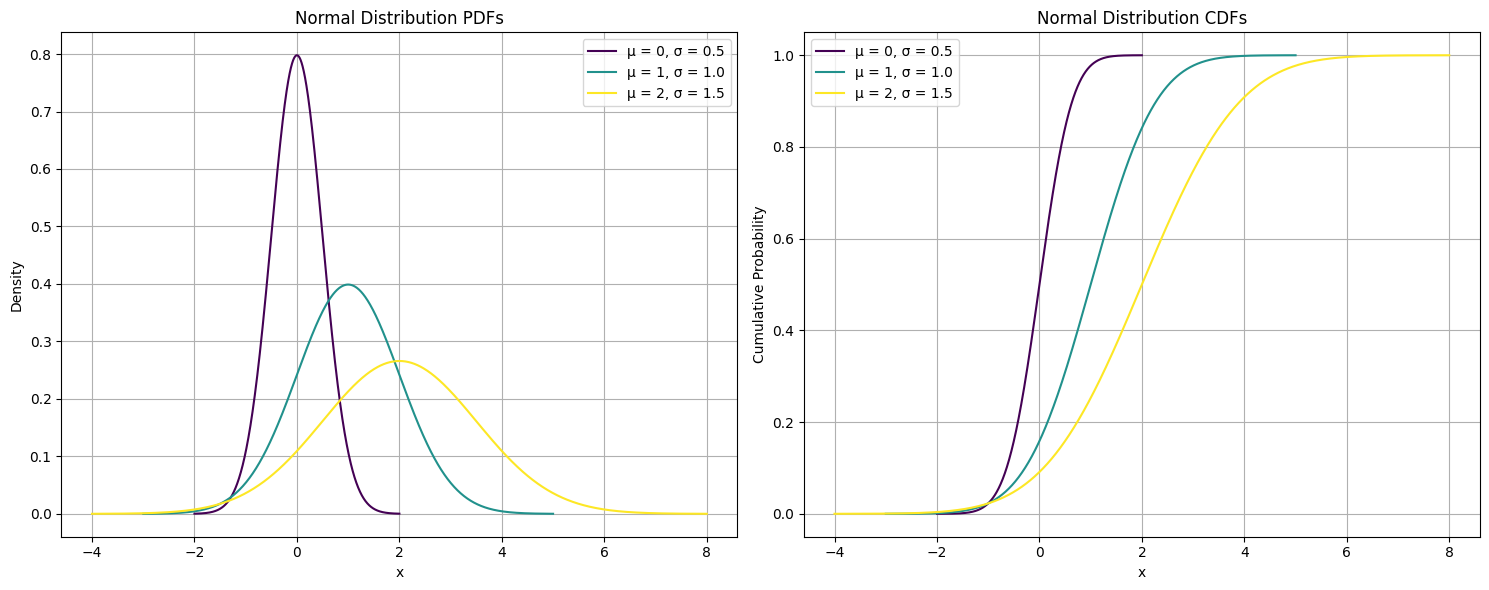

In [4]:
mu_vals = np.array([0, 1, 2])
sigma_vals = np.array([0.5, 1, 1.5])

plot_normal(mu_vals, sigma_vals)